In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_csv("dataset_group.csv")

In [3]:
df.head()

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose


In [4]:
df.shape

(20641, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [6]:
df.describe(include="all")

,Date,Order_id,Product
count,20641,20641.000000,20641
unique,603,NaN,37
top,2019-02-08,NaN,poultry
freq,183,NaN,640
mean,NaN,575.986289,NaN
std,NaN,328.557078,NaN
min,NaN,1.000000,NaN
25%,NaN,292.000000,NaN
50%,NaN,581.000000,NaN
75%,NaN,862.000000,NaN


In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df.shape

(15911, 3)

In [9]:
df['Product'] = df['Product'].str.lower()

In [10]:
df = df.drop(df[df.Product == 'none'].index)

In [11]:
df.shape

(15911, 3)

In [12]:
df.Date.value_counts()

2019-02-08    138
2019-02-20    106
2018-03-06     99
2018-05-17     92
2018-03-01     91
             ... 
2019-03-11      4
2019-09-05      4
2018-04-04      4
2020-02-26      3
2018-09-24      3
Name: Date, Length: 603, dtype: int64

In [13]:
df.Order_id.value_counts()

311     26
450     25
648     25
955     24
866     24
        ..
243      3
1139     3
1044     3
523      3
408      3
Name: Order_id, Length: 1139, dtype: int64

In [14]:
df.Product.value_counts()

poultry                         480
ice cream                       454
cereals                         451
lunch meat                      450
waffles                         449
soda                            445
cheeses                         445
eggs                            444
dinner rolls                    443
dishwashing liquid/detergent    442
bagels                          439
aluminum foil                   438
yogurt                          438
milk                            433
soap                            432
coffee/tea                      432
toilet paper                    431
laundry detergent               431
juice                           429
mixes                           428
individual meals                428
beef                            427
all- purpose                    427
spaghetti sauce                 425
pasta                           423
ketchup                         423
fruits                          422
tortillas                   

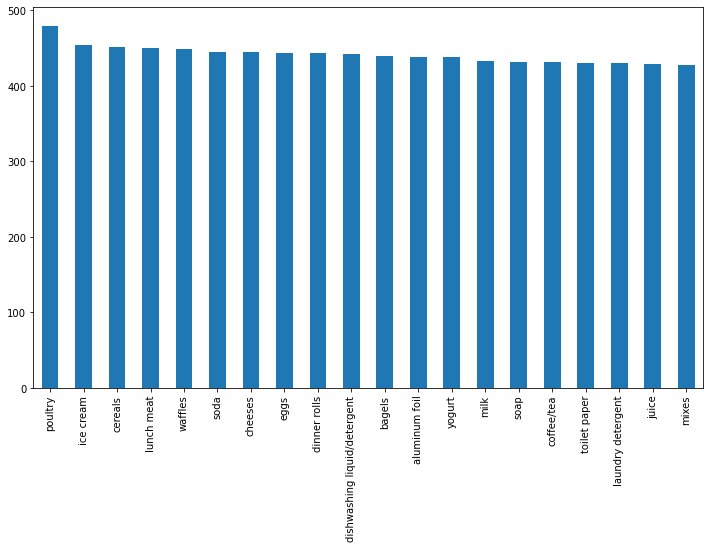

In [15]:
df['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));

In [16]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [17]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [18]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [19]:
basket=basket.applymap(encode_zero_one)

In [20]:
#Find the support for itemsets using Apriori
itemsets = apriori(basket, min_support = 0.01, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
610567,0.010536,"(soda, sandwich bags, soap, pork, spaghetti sa..."
610568,0.011414,"(soda, sandwich bags, waffles, soap, spaghetti..."
610569,0.010536,"(soda, soap, poultry, laundry detergent, sandw..."
610570,0.011414,"(sandwich bags, milk, poultry, yogurt, mixes, ..."


C:\Users\athisya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


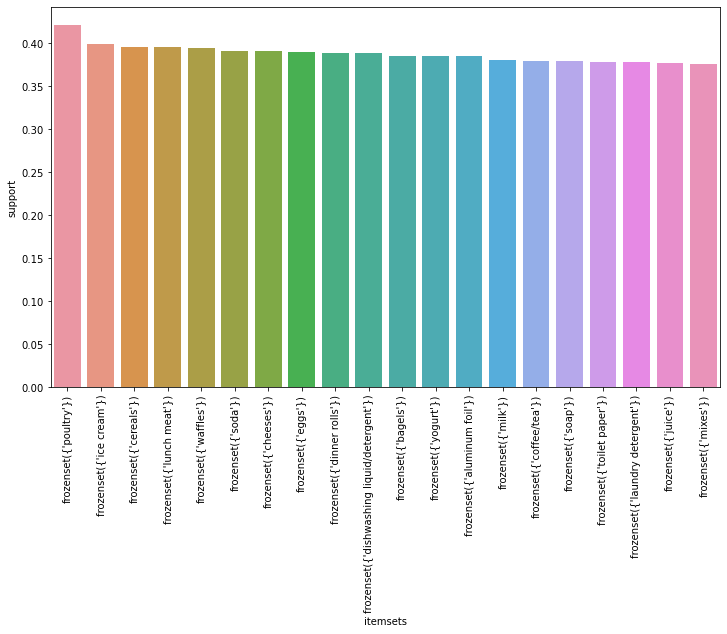

In [21]:
#Visualizing the Support of itemsets
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Check the rules using association_rules
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [ ]:
basket.head(20)